In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Load Clean Data

In [2]:
data = pd.read_csv("Ansar1Clean.csv", index_col=0)
data.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
2,10004,1197,Latest Coalition Fatalities - Iraq/Afghanistan...,54,ANSAR 007,Iraq Office of the Assistant Secretary of Defe...,2009.0,4.0,22.0,2009-04-22 00:00:00.000,2051.0
3,10005,4031,Gunmen kill three Russian soldiers in Chechnya,932,Abu Fatima,As'Salaamu alaikum. Because the war is over an...,2009.0,4.0,22.0,2009-04-22 00:00:00.000,10005.0
4,10006,4032,More Pakistani cities fall into Taliban hand,54,ANSAR 007,More Pakistani cities fall into Taliban hand W...,2009.0,4.0,22.0,2009-04-22 00:00:00.000,10006.0
5,10007,4031,Gunmen kill three Russian soldiers in Chechnya,54,ANSAR 007,3 soldiers killed in Chechnya despite 'stabili...,2009.0,4.0,22.0,2009-04-22 00:00:00.000,10005.0
6,10008,4033,Jaish Abu Bakr al-Siddiqq al-Salafi: Bombing C...,12,Insurgent,بسم الله الرحمن الرحيم الحمد لله ناصر المؤمنين...,2009.0,4.0,22.0,2009-04-22 00:00:00.000,10008.0


In [3]:
#get all threads
threads = data["ThreadID"].unique()

threads = threads[:100]

# Make Graph

In [7]:
edges = []
weights = []
for i in range(0,len(threads)):
    for j in range(0, len(threads)):
        if i >= j:
            pass
        else:
            thread1 = data[data["ThreadID"] == threads[i]]["MemberID"]
            thread2 = data[data["ThreadID"] == threads[j]]["MemberID"]
            intersection = len(np.intersect1d(thread1,thread2))
            if intersection > 0:
                edges.append([threads[i],threads[j]])
                weights.append(intersection)
        

In [8]:
G = nx.Graph()
G.add_nodes_from(threads)
G.add_edges_from(edges, weights = weights)

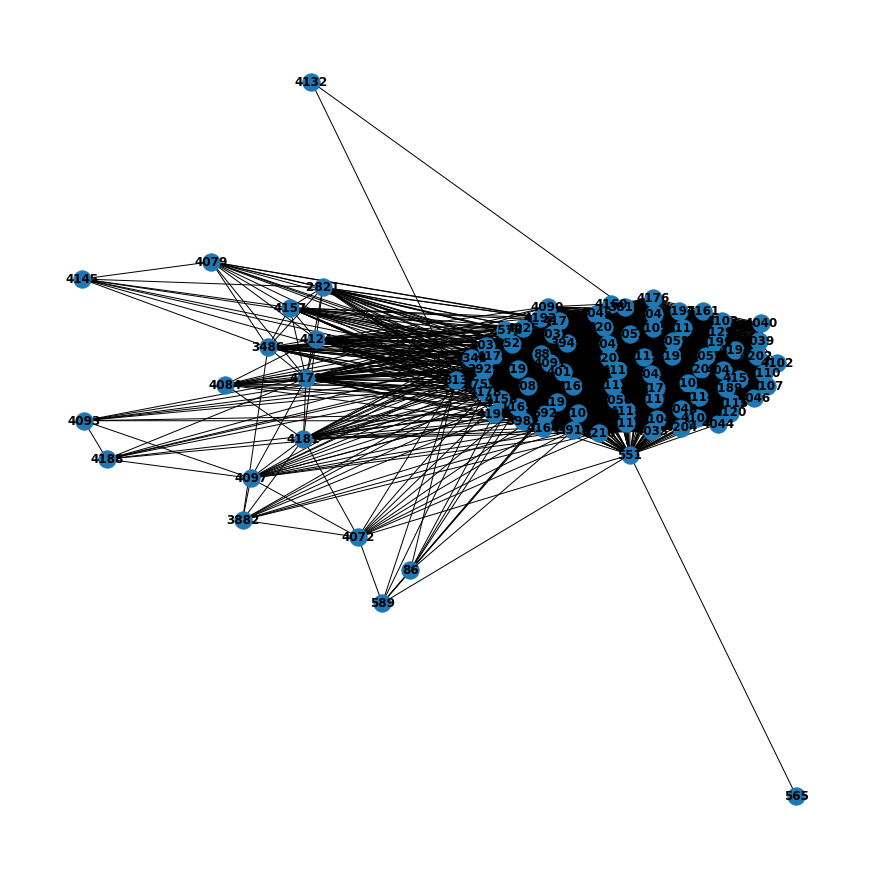

In [9]:

plt.figure(figsize = (12,12))

nx.draw(G, with_labels=True, font_weight='bold')
plt.savefig("threadGraph.png")